### Install Package in Jupyter Notebook

in this project, we will use many package theres use to make multiple linier regression

### Use this command-line in jupyter to install package

conda install scikit-learn <br>
conda install matplotlib <br>
conda install numpy <br>
conda install pandas <br>
conda install seaborn <br>

In [1]:
# Import Libraries needed
# Data cleaning and manipulation 
import numpy as np
import pandas as pd

# data visualization
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings

# machine learning
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

### Read a dataset 

This data in project can you access and download in this link below : <br/>

https://drive.google.com/file/d/1FwVPZT2gb1-xIj0zl6nNmUXIeEPHz1kj/view?usp=share_link

### Data Column

In [2]:
# define a dataset as df
df = pd.read_csv("D:\Imam\Belajar\Python\Data_Science\House Prediction\kc_house_data.csv\house_data.csv")

# print column of data
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


### Top 5 of Dataframe

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Show the dimension of dataset
df.shape

(21613, 21)

In [5]:
# Show detailed information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### The date data type above is an object, so we will convert it to a date format

In [6]:
# Convert a date type 
df['date']  = pd.to_datetime(df['date'])
df['year']  = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day']   = df['date'].dt.day

# Delete a column of date and change a name data from df to data
data = df.drop("date",axis=1)

data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [7]:
# Show detailed information about the dataset from the change before
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

#### As you can see the type of date is change from object to datetime64[ns]

### Checking the null value

In [8]:
# Check the number of missing values in the dataset
data.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
day              0
dtype: int64

#### the data is clean so we can use it

### Show the correlation map

using heatmap to see the correlation of data

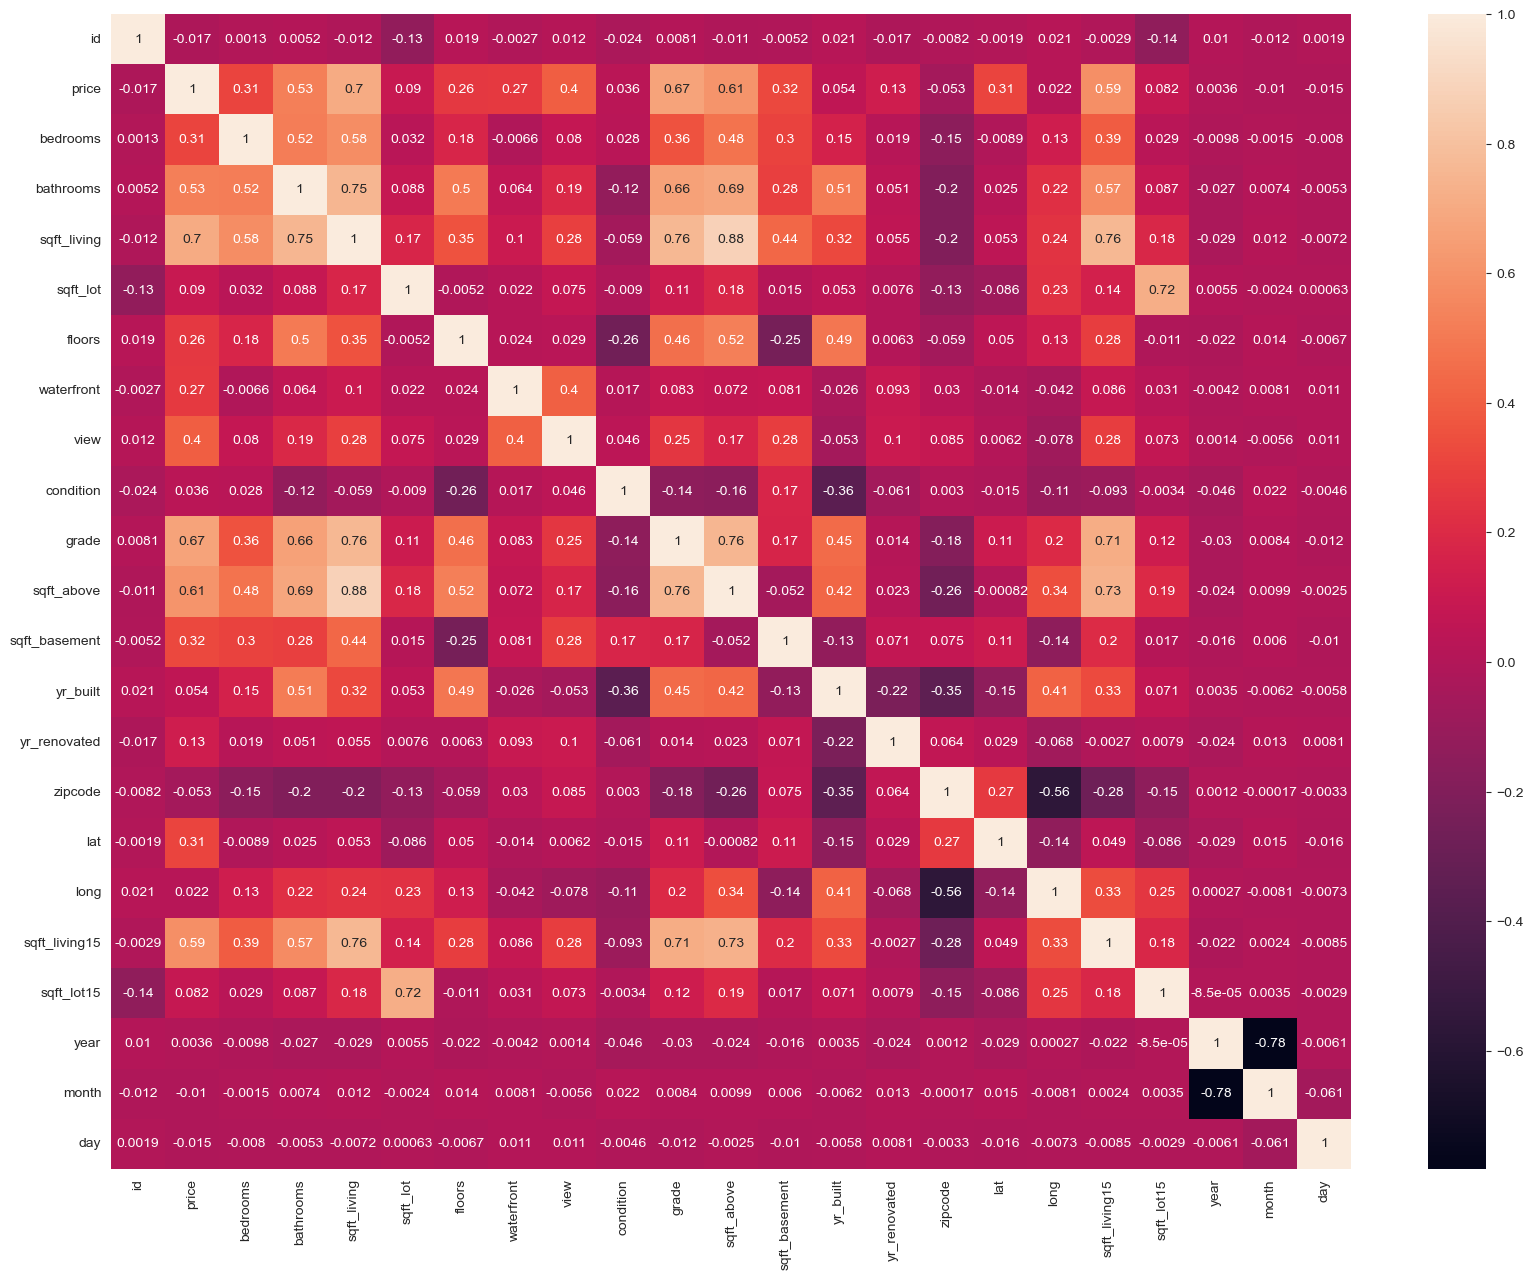

In [9]:
# Show heatmap from data
cormap = data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cormap, annot=True)
plt.show()

In [10]:
# Show descriptive statistical data
data.describe(percentiles=[])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423,15.688197
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308,8.635063
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,1.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000,16.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,31.000000


### Drop column Id and Zipcode

from the correlation map, the id and zipcode have a minus correlation with the price, so we drop the id and zipcode column

In [11]:
# Drop id, and zipcode column
data = data.drop(['id', 'zipcode'], axis = 1)

# Make a initiation to column price as target
target = data['price']

# Drop price column from data
data = data.drop(['price'], axis = 1)
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,day
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10,13
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,9
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2,25
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12,9
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2,18


In [12]:
# Change a value outliers from 33 to 3
data['bedrooms'] = data['bedrooms'].replace(33, 3)
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,day
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10,13
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,9
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2,25
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12,9
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2,18


In [13]:
# change data feature bathrooms from float integer
data['bathrooms'] = data['bathrooms'].astype('int')

In [14]:
# Split data to training dan testing with train_size = 0.8 which ratio 80:20 from training and testing
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, train_size=0.8, shuffle=True)
print ("train size={}, test_size={}, total_size={}".format(
    X_train.shape[0], X_test.shape[0], data.shape[0])
)

train size=17290, test_size=4323, total_size=21613


In [31]:
# Make a Linear Regression without Data Normalization (fit_intercept=False)
model_LR = LinearRegression(fit_intercept=False)
model_LR.fit(X_train, y_train)

print("num_ftrs = {}, num_coeff = {} ".format(X_train.shape[1], len(model_LR.coef_)))
reg_coeff = dict(zip(data.columns, model_LR.coef_))
print(reg_coeff)

num_ftrs = 20, num_coeff = 20 
{'bedrooms': -36721.20470585001, 'bathrooms': 55319.308397407505, 'sqft_living': 107.97332932719111, 'sqft_lot': 0.06753649330307566, 'floors': 494.8662628899945, 'waterfront': 569661.5456887352, 'view': 50005.67114763499, 'condition': 29465.81164191204, 'grade': 96227.81576523483, 'sqft_above': 68.37350751879185, 'sqft_basement': 39.5998220359254, 'yr_built': -2549.3050804421828, 'yr_renovated': 20.808107640768707, 'lat': 548974.4149314003, 'long': -76727.38739447377, 'sqft_living15': 26.839579599690406, 'sqft_lot15': -0.3439490353477817, 'year': -15449.23908531273, 'month': -4829.800328045291, 'day': -499.57255171257486}


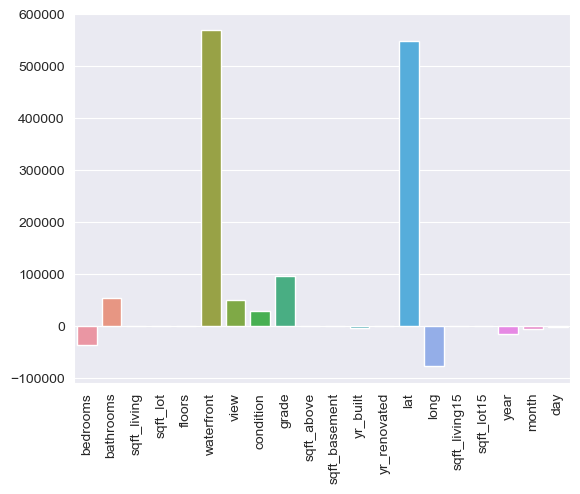

In [16]:
y_pred_train = model_LR.predict(X_train)
y_pred = model_LR.predict(X_test)

sns.barplot(x = X_train.columns, y=model_LR.coef_)
plt.xticks(rotation=90);

In [17]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 128003.00547140262
RMSE: 214277.19656497685
R2 Score: 0.6962844588805821


In [18]:
results= pd.DataFrame(columns=['MAE','RMSE','R2-score'])
results.loc['Linear Regression']=[mean_absolute_error(y_test,y_pred),mean_squared_error(y_test, y_pred, squared=False),r2_score(y_test,y_pred)]

In [19]:
# Normalize data using StandardScaler (Scaling)
from sklearn.preprocessing import StandardScaler
X_train_scale = pd.DataFrame(StandardScaler().fit_transform(X_train), columns = X_train.columns)
X_train_scale.set_index(X_train.index, inplace = True)
X_test_scale = pd.DataFrame(StandardScaler().fit_transform(X_test), columns = X_test.columns)
X_test_scale.set_index(X_test.index, inplace = True)

In [20]:
X_train_scale.mean()

bedrooms         3.190045e-17
bathrooms       -6.472555e-17
sqft_living     -1.800500e-16
sqft_lot        -2.383544e-17
floors           2.434914e-17
waterfront       2.342449e-17
view            -2.999978e-17
condition        3.279428e-16
grade           -2.473954e-16
sqft_above      -1.173279e-16
sqft_basement   -5.270509e-17
yr_built        -5.178044e-16
yr_renovated     4.561610e-17
lat             -1.586865e-14
long             3.110535e-14
sqft_living15   -3.739699e-17
sqft_lot15       2.424640e-17
year            -1.969250e-13
month           -1.068485e-17
day              1.664371e-17
dtype: float64

In [21]:
#Make a Linear Regression without Data Normalization (fit_intercept=True)
model_norm = LinearRegression(fit_intercept=True)
model_norm.fit(X_train_scale, y_train)

LinearRegression()

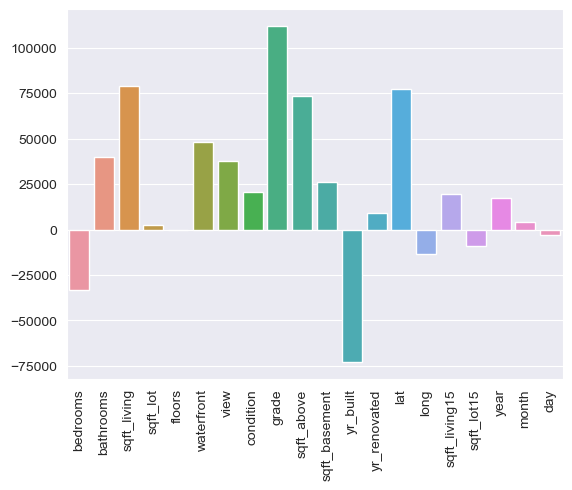

In [22]:
y_pred_train = model_norm.predict(X_train_scale)
y_pred = model_norm.predict(X_test_scale)

sns.barplot(x = X_train_scale.columns, y=model_norm.coef_)
plt.xticks(rotation=90);

In [23]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 125651.89554029638
RMSE: 214741.23043825015
R2 Score: 0.6949675954601786


In [24]:
results.loc['Linear Regression Normalized']=[mean_absolute_error(y_test,y_pred),mean_squared_error(y_test, y_pred, squared=False),r2_score(y_test,y_pred)]

In [25]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train_scale, y_train)

Ridge(alpha=0.5)

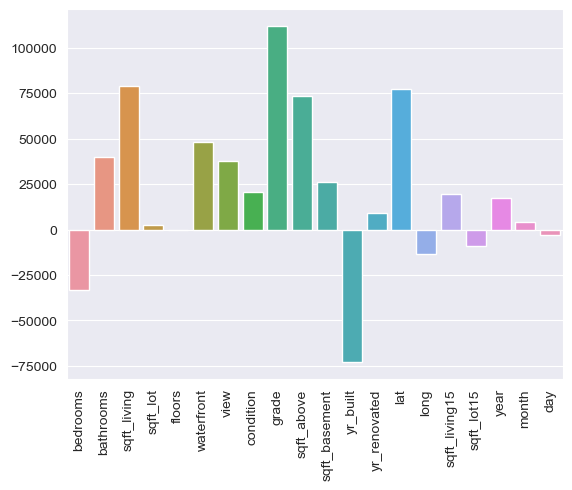

In [26]:
y_pred_train = ridge_model.predict(X_train_scale)
y_pred = ridge_model.predict(X_test_scale)

sns.barplot(x = X_train_scale.columns, y=ridge_model.coef_)
plt.xticks(rotation=90);

In [27]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 125650.99344932589
RMSE: 214741.5654295884
R2 Score: 0.6949666437724855


In [28]:
results.loc['Ridge']=[mean_absolute_error(y_test,y_pred),mean_squared_error(y_test, y_pred, squared=False),r2_score(y_test,y_pred)]

In [29]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='GnBu',subset=['R2-score'])

,MAE,RMSE,R2-score
Linear Regression,128003.005471,214277.196565,0.696284
Linear Regression Normalized,125651.895540,214741.230438,0.694968
Ridge,125650.993449,214741.565430,0.694967


In [33]:
# Prediction Test
model_LR.predict([[3,2,1800,4500,2,0,0,4,8,750,900,1995,0,47,-122,1700,6000,2015,12,3]])

array([101292.02640282])